[(0, 5), (-5, 0), (0, 0), (5, 0), (0, -5)]
[0.5000000000000001, 0.5000000000000001, 0.5000000000000001, 0.5000000000000001, 0.5000000000000001]
[(0, 2.5), (-2.5, 0), (0, 0), (2.5, 0), (0, -2.5)]
[0.5000000000000001, 0.5000000000000001, 0.5000000000000001, 0.5000000000000001, 0.5000000000000001]
[(0, 1.25), (-1.25, 0), (0, 0), (1.25, 0), (0, -1.25)]
[0.5000000000000001, 0.5000000000000001, 0.5000000000000001, 0.5000000000000001, 0.5000000000000001]
[(0, 0.625), (-0.625, 0), (0, 0), (0.625, 0), (0, -0.625)]
[0.5000000000000001, 0.5000000000000001, 0.5000000000000001, 0.5000000000000001, 0.5000000000000001]
[(0, 0.3125), (-0.3125, 0), (0, 0), (0.3125, 0), (0, -0.3125)]
[0.5000000000000001, 0.5000000000000001, 0.5000000000000001, 0.5000000000000001, 0.5000000000000001]
[(0, 0.15625), (-0.15625, 0), (0, 0), (0.15625, 0), (0, -0.15625)]
[0.5000000000000001, 0.5000000000000001, 0.5000000000000001, 0.5000000000000001, 0.5000000000000001]
[(0, 0.078125), (-0.078125, 0), (0, 0), (0.078125, 0), (

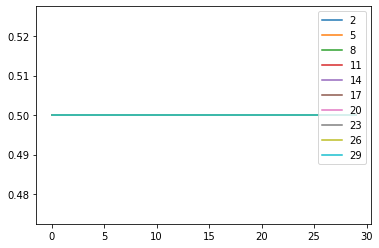

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import base_psx.grid_bubble, base_psx.base
import importlib
from matplotlib import animation
importlib.reload(base_psx.grid_bubble)

def func(x):
    return x**2 + np.cos(x + 2)

def dfunc(x):
    return 2*x - np.sin(x + 2)

def func2(x):
    return np.sin(x)

def dfunc2(x):
    return np.cos(x)

def func3(x):
    return np.log(x)

def dfunc3(x):
    return 1/x

def loss3(r, epsilon):
    x = 1
    loss = np.abs(base_psx.base.param_shift(func3, x, r, epsilon) - dfunc3(x))
    return loss

def loss2(r, epsilon):
    x = np.pi / 3 # np.random.choice([1, 1])
    loss = np.abs(base_psx.base.param_shift(func2, x, r, epsilon) - dfunc2(x))
    return loss
    
def loss(r, epsilon):
    x = 1
    loss = np.abs(base_psx.base.param_shift(func, x, r, epsilon) - dfunc(x))
    return loss

for i in range(2, 30, 3):
    grid_bubble = base_psx.grid_bubble.GridBubble(loss_func = loss, radius = 5)
    solution = grid_bubble.fit(learning_rate = i, threshold=10**(-10))
    plt.plot(grid_bubble.min_losses[:30], label = i)
plt.legend()
# grid_bubble.plot(path = './test/')

What the strategy to adapt the best R

Khi chỉ có một điểm gradient thì lỗi bị chặn dưới MAPE = 3%
Khi random điểm gradient thì lỗi giảm sâu

Có những hàm vẫn ko tìm ra điểm chính xác được như hàm ln
Đã thử với hai hàm bình thường và ok với một điểm đạo hàm cho trước duy nhất

In [2]:
grid_bubble = base_psx.grid_bubble.GridBubble(loss_func = loss3, radius = 5)
solution = grid_bubble.fit(threshold=10**(-20))

C:\Users\haime\AppData\Local\Temp\ipykernel_11408\523543771.py:22: RuntimeWarning: invalid value encountered in log
  return np.log(x)


[(0, 5), (-5, 0), (0, 0), (5, 0), (0, -5)]
[nan, 1.0, 1.0, 1.0, nan]
[(-5, 10), (-15, 0), (-5, 0), (5, 0), (-5, -10)]
[nan, 1.0, 1.0, 1.0, nan]
[(-15, 20), (-35, 0), (-15, 0), (5, 0), (-15, -20)]
[nan, 1.0, 1.0, 1.0, nan]
[(-35, 40), (-75, 0), (-35, 0), (5, 0), (-35, -40)]
[nan, 1.0, 1.0, 1.0, nan]
[(-75, 80), (-155, 0), (-75, 0), (5, 0), (-75, -80)]
[nan, 1.0, 1.0, 1.0, nan]
[(-155, 160), (-315, 0), (-155, 0), (5, 0), (-155, -160)]
[nan, 1.0, 1.0, 1.0, nan]
[(-315, 320), (-635, 0), (-315, 0), (5, 0), (-315, -320)]
[nan, 1.0, 1.0, 1.0, nan]
[(-635, 640), (-1275, 0), (-635, 0), (5, 0), (-635, -640)]
[nan, 1.0, 1.0, 1.0, nan]
[(-1275, 1280), (-2555, 0), (-1275, 0), (5, 0), (-1275, -1280)]
[nan, 1.0, 1.0, 1.0, nan]
[(-2555, 2560), (-5115, 0), (-2555, 0), (5, 0), (-2555, -2560)]
[nan, 1.0, 1.0, 1.0, nan]
[(-5115, 5120), (-10235, 0), (-5115, 0), (5, 0), (-5115, -5120)]
[nan, 1.0, 1.0, 1.0, nan]
[(-10235, 10240), (-20475, 0), (-10235, 0), (5, 0), (-10235, -10240)]
[nan, 1.0, 1.0, 1.0, nan]
[

In [2]:
grid_bubble2 = base_psx.grid_bubble.GridBubble(loss_func = loss2, radius = 2)
solution = grid_bubble2.fit(threshold=10**(-20))

[(-2, 2), (0, 2), (2, 2), (-2, 0), (0, 0), (2, 0), (-2, -2), (0, -2), (2, -2)]
[2.3185948536513643, 0.5000000000000001, 1.3185948536513643, 0.5000000000000001, 0.5000000000000001, 0.5000000000000001, 1.3185948536513643, 0.5000000000000001, 2.3185948536513643]
[(-1.0, 1.0), (0, 1.0), (1.0, 1.0), (-1.0, 0), (0, 0), (1.0, 0), (-1.0, -1.0), (0, -1.0), (1.0, -1.0)]
[1.341470984807897, 0.5000000000000001, 0.3414709848078967, 0.5000000000000001, 0.5000000000000001, 0.5000000000000001, 0.3414709848078967, 0.5000000000000001, 1.341470984807897]
[(-1.0, 3.0), (1.0, 3.0), (3.0, 3.0), (-1.0, 1.0), (1.0, 1.0), (3.0, 1.0), (-1.0, -1.0), (1.0, -1.0), (3.0, -1.0)]
[0.6411200080598675, 0.35887999194013276, 0.07663997582039805, 1.341470984807897, 0.3414709848078967, 2.0244129544236906, 0.3414709848078967, 1.341470984807897, 3.0244129544236906]
[(-1.0, 7.0), (3.0, 7.0), (7.0, 7.0), (-1.0, 3.0), (3.0, 3.0), (7.0, 3.0), (-1.0, -1.0), (3.0, -1.0), (7.0, -1.0)]
[1.1569865987187895, 1.4709597961563676, 4.0989

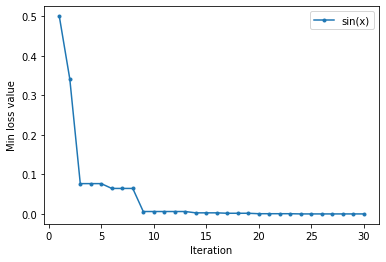

In [6]:
# plt.plot(grid_bubble.min_losses[0:30], label = 'ln(x)')
plt.plot(range(1, 31), grid_bubble2.min_losses[0:30], marker = '.', label = 'sin(x)')
plt.xlabel('Iteration')
plt.ylabel('Min loss value')
plt.legend()

In [32]:
r, s = solution

C:\Users\haime\AppData\Local\Temp/ipykernel_4108/4258153163.py:22: RuntimeWarning: invalid value encountered in log
  return np.log(x)


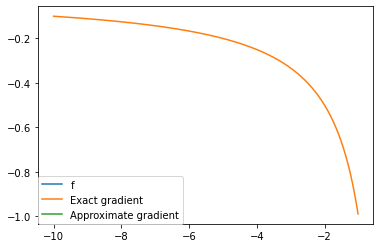

In [46]:
reals = []
fakes = []
origins = []

reals2 = []
fakes2 = []
origins2 = []

xs2 = np.arange(-10, -1, 0.01)
for x in xs2:
    origins2.append(func3(x))
    reals2.append(dfunc3(x))
    fakes2.append(base_psx.base.param_shift(func3, x, r, s))

xs = np.arange(1, 10, 0.01)
for x in xs:
    origins.append(func3(x))
    reals.append(dfunc3(x))
    fakes.append(base_psx.base.param_shift(func3, x, r, s))



# plt.plot(xs, origins, label="f")
# plt.plot(xs, reals, label="Exact gradient")
# plt.plot(xs, fakes, label="Approximate gradient")
plt.plot(xs2, origins2, label="f")
plt.plot(xs2, reals2, label="Exact gradient")
plt.plot(xs2, fakes2, label="Approximate gradient")
plt.legend(borderaxespad=0.)

In [47]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(reals, fakes))

0.2876679832751406


In [4]:
rs = np.arange(0, 1, 0.2)
epsilons = np.arange(0, 1, 0.2)
x = np.pi / 3
losses = np.ones((len(rs), len(epsilons)))
for i in range(0, len(rs)):
    for j in range(0, len(epsilons)):
        fake = base_psx.base.param_shift(func2, x, rs[i], epsilons[j])
        loss1 = np.abs(func2(x) - fake)
        losses[i][j] = loss1

print(losses)

[[0.8660254  0.8660254  0.8660254  0.8660254  0.8660254 ]
 [0.8660254  0.82629154 0.78814174 0.75309691 0.72255419]
 [0.8660254  0.78655767 0.71025807 0.64016841 0.57908297]
 [0.8660254  0.74682381 0.6323744  0.52723992 0.43561175]
 [0.8660254  0.70708994 0.55449073 0.41431143 0.29214053]]
